<a href="https://colab.research.google.com/github/sherif201/test-repo/blob/master/Basic_operations_on_the_Normal_Distribution_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic operations on the Normal Distribution in Python

The normal curve is one of the most important distributions in statistics and probability. It has wide applications also in machine learning. In this post, we will come across some basic operations that are frequently needed on the normal curve, and how to perform them in Python, using libraries like numpy and scipy. This includes: sampling, visualization, probability density calculations,..etc. Although such operations might seem simple, but they could be troublesome in some cases, so I want to collect them here with some practices to apply them in Python.

In [0]:
#@title Imports (Double click to see code)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import erf, sqrt
from scipy.stats import norm
from scipy.stats import multivariate_normal

# Formula



For $n$ - dimensions random variable $X$:

__Multi-variate normal__

$$P(X) = P(X; \mu, \Sigma)= \frac{1}{(2\pi)^{n/2} |\Sigma |^{1/2}} exp (-\frac{1}{2}(X-\mu)^T\Sigma^{-1}(X-\mu))$$

This is denoted by $N(\mu, \Sigma)$

$$X = [x_1, x_2,....x_{n}]$$

$$\mu = [\mu_1, \mu_2,....\mu_{n}]$$



$$ \Sigma = 
\begin{bmatrix}
\sigma_{11}^2 & \sigma_{12}^2 & ... & \sigma_{1n}^2\\
\sigma_{21}^2 & \sigma_{22}^2 & ... & \sigma_{2n}^2\\
...\\
\sigma_{n1}^2 & \sigma_{n2}^2 & ... & \sigma_{nn}^2\\
\end{bmatrix}
$$

__n=1 Normal Distribution__ 
$$P(x) = P(x; \mu, \sigma)= \frac{1}{\sqrt{2\pi \sigma}} exp (-\frac{(x-\mu)^2}{2\sigma^2})$$

__n=2 Bivariate normal distribution__

For 2D:
$$X = [x_1, x_2]$$

$$\mu_i = [\mu_{x_1}, \mu_{x_2}]$$


$$ \Sigma = 
\begin{bmatrix}
\sigma_{xx}^2 & \sigma_{xy}^2\\
\sigma_{yx}^2 & \sigma_{yy}^2\\
\end{bmatrix}
$$


If $\mu=0$ and $\Sigma=I$, we have a __standard normal distribution__


# Why it's so important?

We can use the normal distribution to describe many physical and natural phenomena. 

By __"describe"__, we mean that the normal distrbution is a good way to model the distribution of the event we want to describe.

By __"model"__, we mean to be able to simulate the event or phenomena using that model. In other words, if we generate samples from this model, it will be very similar to the real samples we encounter in the real world.

By __"distribution"__, we mean to count the events, cluster them in "bins" (ranges of values), and count the values in each bin, and normalize the counts. If the bins ranges are so narrow, we get continous random variables, while if they are so wide, we get discrete random variable. The values of the bins are the sample space of the random variable or event. This can be done using histograms. 

If the counts are normalized, then the total counts (summation for discrete and integration for continous) will sum to 1. This is called a __probability density function or pdf__.


# Example on Titanic dataset

To better understand the concept let's have an example on the Titanic dataset on Kaggle.

First let's load the dataset

[Source in kaggle](https://www.kaggle.com/c/titanic/data)

[How to use the kaggle API and get usr and key](https://github.com/Kaggle/kaggle-api)

In [0]:
#@title First let's download the dataset
user = "" #@param {type:"string"}
key = "" #@param {type:"string"}
from getpass import getpass
import os
user = ''
key = ''

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c titanic

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now, let's pick a variable, and plot it's histogram:

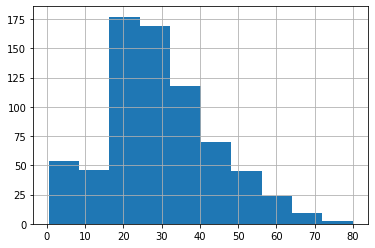

In [0]:
var = 'Age'
X = train_df[var]
X.hist()

If we want to model its distribution (meaning to have a function that maps the probability that the data variable could take a certain value), we have two ways:

- __Non-parametric__: as you can see, we can plot the histogram of data, and divide it into bins (which are a design choice, more bins means higher model resolution, but more sensitivity and variability). The probability of values falling inside a certain bin is simply $\frac{k}{N}$, where $k$ are the counts of values in that bin, and $N$ is the whole data size.

- __Parametric__: here if we smooth the hitogram, it's clear that it follows a Gaussian/normal distrbution. In other cases, it could follow any known or unknown distribution/density function, or even a mixture of known ones. If we put the assumption that the distribution follows some __known__ function, then we are doing parameteric estimation, and we are only left with the task to estimate the model parameters, mean $\mu$ and standard deviation $\sigma$ (or variance $\sigma^2$) in case of normal.

Having the model (parametric or non-parametric), we can use it to perform some operations:

- __Sampling__ since the model describes the phenomenon, we can use it to generate "synthetic" samples of the event or RV.

- __Probability estimation__ of the RV takes certain value or a value within some range

- __Plotting__ simple plot the distribution, to see if it matches our observations

Let's see how to perform those basic operations in Python

# Sampling

__Generative process__

With the model of the underlying process or variable at hand (parametric or non-parametric), we can have a __generative__ function that simulates the variable or the process. In other words, we can __sample__ from this model distribution to obtain artificial data points, that are never measured, but are likely to be obtained with certain probability range.

Numpy provides a simple interface for that


To sample 1D:

In [0]:
m = 10
mu, sigma = 0.25, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 10)
x

array([0.15020596, 0.33384624, 0.16038929, 0.1369385 , 0.33297416,
       0.26137196, 0.32717266, 0.12828049, 0.26883467, 0.1622976 ])

To sample n-D

In [0]:
m = 10
mean = np.array([0, 0])
cov = np.array([[2, -1], [-1, 1]])
x = np.random.multivariate_normal(mean, cov, m)
print(x)
print(x.shape)

[[ 0.12994971 -0.38296241]
 [-1.04783248 -0.11978351]
 [-0.20828526  1.18576041]
 [ 0.01808587  2.00271582]
 [ 1.15476108 -0.96127772]
 [ 0.58786906 -0.12508821]
 [ 1.72968973 -0.84961663]
 [ 1.03742775  0.06530661]
 [ 0.13852126  0.43352697]
 [ 0.9198747  -0.79360047]]
(10, 2)


For both cases:

As you can see above, $m$ samples are generated. They have the given $\mu$ and $\sigma$ for 1D or covariance $\Sigma$ in n-D. The shape of $\mu$ is always $n \times 1$. The shape of $\Sigma$ is always $n \times n$.

In general, we have more than one sample. We denote that as __dataset__:
$$X = [(X^1)^T, (X^2)^T,..., (X^m)^T]$$

The shape of the returned RV is $m \times n$, $X \in {\Bbb R}^{m \times n}$


__But how we get $\mu$ and $\Sigma$ in the first place?__

The answer is that we estimate them from __sample__ data.

The process is that we assume the best model to describe some dataset $X$ is the normal curve $N(\mu, \Sigma)$, then we __fit__ the distribution parameters to the data.

# How to fit a model to data?

Now, under the _parametric_ estimation framework, suppose we are given a list of data points as above, and we want to obtain the parameters of the assumed model. This can be done under the __Maximum Likelihood Estimation__ __(MLE)__ framework

The maximum likelihood is defined as:
$$L(X, \Theta) = max_{\Theta} P(X; \Theta) = max_{\Theta} L(\Theta)$$
Where $X$ are the observed data, and $\Theta$ are the model parameters. $L(\Theta)$ is the likelihood of the parameters, which we want to maximize. IT also corresponds to maximizing the data $X$ probability. Hence, the paramers can be obtained as:

$$\Theta^* = argmax_{\Theta} L(\Theta)$$

What this basically says, is that the optimal model parameters $\Theta$ are obtained with an optimzation problem to maximize the __Likelihood__ of the underlying data.  You can think of this as a _search_ problem for the best $\Theta^*$, in the space of all possible $\Theta$s, such that it maximizes the probability of obtaining the data points observed at hand.

Under the model assumption of Gaussian/Normal, this becomes:
$$\Theta = [\mu, \sigma]$$

And the optimization problem becomes:

$$\mu^*, \sigma^* = argmax_{\mu,\Sigma} P(X; \mu, \sigma) = argmax_{\mu,\sigma} N(\mu,\sigma|X)$$



# Unbiased MLE estimates of $\mu$ and $\sigma$

Keep in mind that, $\Theta^*$ is only an estimate of the true population parameters. In other words, we did not see all the $X$s in the world to validate our assumption or to obtain the most accurate estimate of the model parameters.

It is said that our estimate is __unbiased__ if its expected value with inifinte data points is the same as the true parameters $\Theta_0$

$$lim_{m->\infty} E[\Theta^*] = \Theta_0$$


Where $m$ is the total number of samples.

## MLE of Normal distribution

We will derive the formula following MLE for $\mu$ only, and leave $\Sigma$ for the reader, since we will need the one for $\mu$ later when we talk about the probabilistic interpretation of regression:

$$X^i = [1, x_1, x_2,..., x_n]$$
$$\theta = [\theta_0, \theta_1, \theta_2, ...,\theta_n]$$

Where $n$ is the dimension of the input data or the number of features.

For an entire data set, we have:
$$X = [(X^1)^T, (X^2)^T,..., (X^m)^T]$$
$X \in {\Bbb R}^{m \times n}$

$$L(\mu) = \prod_{i=1}^{m} P(X^i;\mu,\Sigma)=\prod_{i=1}^{m} \frac{1}{(2\pi)^{n/2} |\Sigma |^{1/2}} exp (-\frac{1}{2}(X^i-\mu)^T\Sigma^{-1}(X^i-\mu))$$

For simmplicty, we take the log. Since the log is monotonic, maximizing the log is the same as maximizing the original function:

$$l(\mu) = log L(\mu) = -m.\frac{n}{2}log 2\pi-m.\frac{1}{2}log \Sigma -\frac{1}{2} \sum_{i=1}^m (X^i-\mu)^T\Sigma^{-1}(X^i-\mu) $$

$$l(\mu) = C -\frac{1}{2} \sum_{i=1}^m (X^i-\mu)^T\Sigma^{-1}(X^i-\mu)$$

To maximize $l(\mu)$, we set:

$$\nabla_\mu(l(\mu)) = 0$$

Using the following property, if $A^T=A$:

$$\nabla_\theta f(x;\theta)^T A f(x;\theta) = 2A\nabla_\theta f(x;\theta)$$

To understand this, consider the term $\alpha^T A \alpha$ similar to $A\alpha^2$ if $\alpha$ was 1D.

Mapping $A->\Sigma^{-1}$ and $f(x;\theta)->(X^i-\mu)$ so we have:

$$\nabla_\mu(l(\mu)) = \Sigma^{-1} \sum_{i=1}^m (X^i-\mu) = 0$$

So we get:

$$ \sum_{i=1}^m X^i = \sum_{i=1}^m \mu = m \mu $$ 

Therefore:
$$ \mu = \frac{1}{m} \sum_{i=1}^m X^i$$ 

For the 1D normal curve, the unbiased MLE estimates are:

$$\mu = \frac{1}{m}\sum_{i=1}^m x^i$$
$$\sigma^2 = \frac{1}{m-1}\sum_{i=1}^m (x^i-\mu)^2$$

Where $m$ is the total number of samples.

For the n-D normal curve, the unbiased MLE estimates are:

$$\mu = \frac{1}{m}\sum_{i=1}^m X^i$$
$$\Sigma = \frac{1}{m-1}\sum_{i=1}^m (X^i-\mu)^T(X^i-\mu)$$

Let's do that for the above Titanice Age data:

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


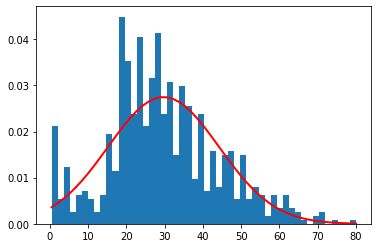

In [0]:

count, bins, ignored = plt.hist(np.array(X), 50, density=True)
mu = X.mean()
sigma = X.std()
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')


# Probability of an event
According to frequentist statistics, the normalized counts can be used to approximate the probability that the random variable (RV) (the phenomena or event), will take the value in the range of that bin. 

For continous RVs, this corresponds to the probability the random variable will take the value in a very narrow range, such that it can be single value at the limit. This corresponds to the count of how many times we count the RV takes that value from the sample we collect. Since this is very rare, this probability (count) will almost be 0.



/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


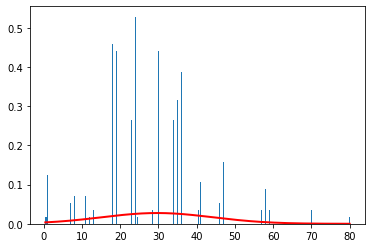

In [0]:

count, bins, ignored = plt.hist(np.array(X), 1000, density=True)
mu = X.mean()
sigma = X.std()
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

As you can see, for many values on the x-axis (sample space), we don't have any counts, so their probability is 0. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


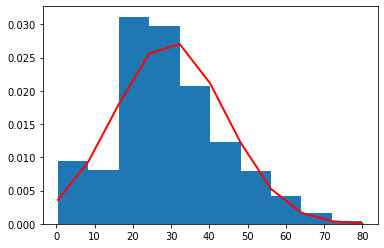

In [0]:

count, bins, ignored = plt.hist(np.array(X), 10, density=True)
mu = X.mean()
sigma = X.std()
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

For discrete RVs, the bin width is larger, hence the probability to be in that value range is higher.
For that reason, we rarely want to calculate the probability a RV takes single value for continous cases, instead it will be a range over many values, which corresponds to a wider bin. In this case, we have to accumulate many small values from small bins to find the count in the bigger bin range. This summation (integration for continous RVs) is given by the __commulation density function (CDF)__ 

# Calculate formula (PDF)

The formula of normal distribution gives the probability that the R.V. $X$ takes certain __exact__ value; $P(X=X_0; \mu, \Sigma)$. This is called __probability density function (pdf)__

In case of continous RV $X$, this probability translates to an __area under the curve__ (CDF). The area in this case will be very small, and hence the probability is almost zero.


This value can be obtained in several ways:

## Using the formula

[4.69519536e-34 5.74770746e-33 6.75477905e-32 7.62084525e-31
 8.25411740e-30 8.58249666e-29 8.56706670e-28 8.20967862e-27
 7.55258580e-26 6.67022805e-25 5.65537230e-24 4.60317220e-23
 3.59690316e-22 2.69821016e-21 1.94311410e-20 1.34337214e-19
 8.91599622e-19 5.68092318e-18 3.47490919e-17 2.04053246e-16
 1.15032102e-15 6.22544085e-15 3.23442189e-14 1.61323906e-13
 7.72460518e-13 3.55082572e-12 1.56696006e-11 6.63837833e-11
 2.69986206e-10 1.05413603e-09 3.95118385e-09 1.42178302e-08
 4.91150865e-08 1.62881592e-07 5.18566672e-07 1.58493954e-06
 4.65046417e-06 1.30995208e-05 3.54233815e-05 9.19602468e-05
 2.29184764e-04 5.48336128e-04 1.25945740e-03 2.77712615e-03
 5.87872623e-03 1.19466562e-02 2.33069262e-02 4.36514967e-02
 7.84853826e-02 1.35473367e-01 2.24488745e-01 3.57117162e-01
 5.45383979e-01 7.99594012e-01 1.12541369e+00 1.52065382e+00
 1.97253185e+00 2.45636666e+00 2.93655316e+00 3.37021839e+00
 3.71324602e+00 3.92757880e+00 3.98815100e+00 3.88770929e+00
 3.63824110e+00 3.268621

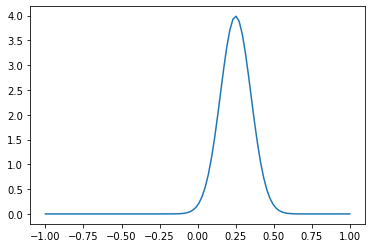

In [0]:
m = 100
x = np.linspace(-1, 1, m)
mu, sigma = 0.25, 0.1
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
print(p_x)
plt.plot(x,p_x)

## Using scipy
The scipy library provides means to calculate the equation directly as follows:

[4.69519536e-34 5.74770746e-33 6.75477905e-32 7.62084525e-31
 8.25411740e-30 8.58249666e-29 8.56706670e-28 8.20967862e-27
 7.55258580e-26 6.67022805e-25 5.65537230e-24 4.60317220e-23
 3.59690316e-22 2.69821016e-21 1.94311410e-20 1.34337214e-19
 8.91599622e-19 5.68092318e-18 3.47490919e-17 2.04053246e-16
 1.15032102e-15 6.22544085e-15 3.23442189e-14 1.61323906e-13
 7.72460518e-13 3.55082572e-12 1.56696006e-11 6.63837833e-11
 2.69986206e-10 1.05413603e-09 3.95118385e-09 1.42178302e-08
 4.91150865e-08 1.62881592e-07 5.18566672e-07 1.58493954e-06
 4.65046417e-06 1.30995208e-05 3.54233815e-05 9.19602468e-05
 2.29184764e-04 5.48336128e-04 1.25945740e-03 2.77712615e-03
 5.87872623e-03 1.19466562e-02 2.33069262e-02 4.36514967e-02
 7.84853826e-02 1.35473367e-01 2.24488745e-01 3.57117162e-01
 5.45383979e-01 7.99594012e-01 1.12541369e+00 1.52065382e+00
 1.97253185e+00 2.45636666e+00 2.93655316e+00 3.37021839e+00
 3.71324602e+00 3.92757880e+00 3.98815100e+00 3.88770929e+00
 3.63824110e+00 3.268621

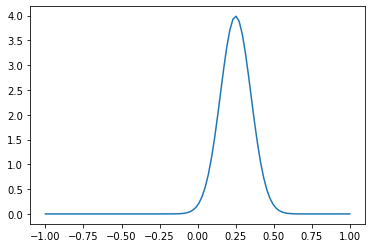

In [0]:

m = 100
x = np.linspace(-1, 1, m)
mu, sigma = 0.25, 0.1
p_x = norm.pdf(x,mu,sigma)
print(p_x)
plt.plot(x,p_x) 

It can also be done using the multivariate function as follows (n=1):


[5.10486693e-04 6.55795640e-04 8.39035186e-04 1.06910257e-03
 1.35670718e-03 1.71466950e-03 2.15825261e-03 2.70552577e-03
 3.37775874e-03 4.19984369e-03 5.20074044e-03 6.41393835e-03
 7.87792667e-03 9.63666222e-03 1.17400214e-02 1.42442207e-02
 1.72121866e-02 2.07138559e-02 2.48263804e-02 2.96342138e-02
 3.52290527e-02 4.17096044e-02 4.91811553e-02 5.77549127e-02
 6.75470969e-02 7.86777615e-02 9.12693278e-02 1.05444822e-01
 1.21325815e-01 1.39030065e-01 1.58668890e-01 1.80344288e-01
 2.04145848e-01 2.30147499e-01 2.58404171e-01 2.88948423e-01
 3.21787144e-01 3.56898399e-01 3.94228539e-01 4.33689664e-01
 4.75157549e-01 5.18470135e-01 5.63426679e-01 6.09787644e-01
 6.57275407e-01 7.05575831e-01 7.54340733e-01 8.03191258e-01
 8.51722141e-01 8.99506802e-01 9.46103211e-01 9.91060419e-01
 1.03392562e+00 1.07425161e+00 1.11160445e+00 1.14557122e+00
 1.17576753e+00 1.20184477e+00 1.22349682e+00 1.24046600e+00
 1.25254816e+00 1.25959680e+00 1.26152604e+00 1.25831229e+00
 1.24999480e+00 1.236674

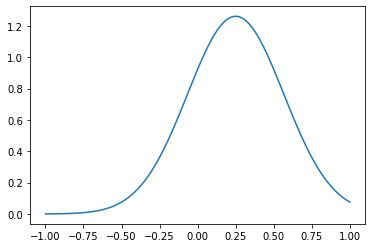

In [0]:

m = 100
x = np.linspace(-1, 1, m)
mu, sigma = 0.25, 0.1
p_x = multivariate_normal.pdf(x,mu,sigma)
print(p_x)
plt.plot(x,p_x) 

__Why different form norm.pdf?__

In case of multivariate, we pass the covariance, which is the variance in 1D, which maps to $\sigma^2$:

[4.69519536e-34 5.74770746e-33 6.75477905e-32 7.62084525e-31
 8.25411740e-30 8.58249666e-29 8.56706670e-28 8.20967862e-27
 7.55258580e-26 6.67022805e-25 5.65537230e-24 4.60317220e-23
 3.59690316e-22 2.69821016e-21 1.94311410e-20 1.34337214e-19
 8.91599622e-19 5.68092318e-18 3.47490919e-17 2.04053246e-16
 1.15032102e-15 6.22544085e-15 3.23442189e-14 1.61323906e-13
 7.72460518e-13 3.55082572e-12 1.56696006e-11 6.63837833e-11
 2.69986206e-10 1.05413603e-09 3.95118385e-09 1.42178302e-08
 4.91150865e-08 1.62881592e-07 5.18566672e-07 1.58493954e-06
 4.65046417e-06 1.30995208e-05 3.54233815e-05 9.19602468e-05
 2.29184764e-04 5.48336128e-04 1.25945740e-03 2.77712615e-03
 5.87872623e-03 1.19466562e-02 2.33069262e-02 4.36514967e-02
 7.84853826e-02 1.35473367e-01 2.24488745e-01 3.57117162e-01
 5.45383979e-01 7.99594012e-01 1.12541369e+00 1.52065382e+00
 1.97253185e+00 2.45636666e+00 2.93655316e+00 3.37021839e+00
 3.71324602e+00 3.92757880e+00 3.98815100e+00 3.88770929e+00
 3.63824110e+00 3.268621

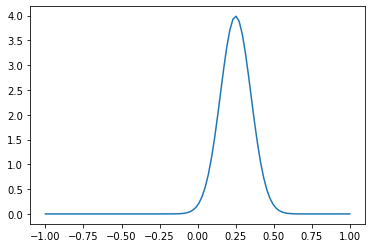

In [0]:

m = 100
x = np.linspace(-1, 1, m)
mu, sigma = 0.25, 0.1**2
p_x = multivariate_normal.pdf(x,mu,sigma)
print(p_x)
plt.plot(x,p_x) 

__How it looks for 2D?__

In case of 2D RV's $X$, can simplify the formula as follows:

The correlation coefficient between any 2 vars is:


$$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_x  \sigma_y}$$

Using this new value, we can rewrite the term inside the exp of the general normal for the 2D case as (easy to proof):

$$(X-\mu)^T\Sigma^{-1}(X-\mu) = \frac{1}{1-\rho_{xy}^2}(\frac{1}{2\sigma_{xx}^2}(x-\mu_x)^2 + \frac{1}{2\sigma_{yy}^2}(y-\mu_y)^2 - 2\rho_{xy}(\frac{x-\mu_x}{\sigma_{xx}}+\frac{y-\mu_y}{\sigma_{yy}}))$$


For  $\sigma_{xy} = \sigma_{yx} = 0$, the formula reduces to (for n=2):

$$p(x; \mu, \sigma) = \frac{1}{(2\pi) |\sigma_{xx}\sigma_{yy} |} exp (-(\frac{1}{2\sigma_{xx}^2}(x-\mu_x)^2 + \frac{1}{2\sigma_{yy}^2}(y-\mu_y)^2)$$

If $\rho_{xy} > 0$, then $x$ and $y$ are __positively__ correlated



In [0]:
m = 10
mean = np.array([0, 0])
cov = np.array([[2, 1], [1, 1]])

sigma_x = cov[0,0]
sigma_y = cov[1,1]
mu_x = mean[0]
mu_y = mean[1]
rho = cov[0,1]/(sigma_x*sigma_y)

x, y = np.random.multivariate_normal(mean, cov, m).T
p_x_y = 1/(2*np.pi*sigma_x*sigma_y) * np.exp(-1/(1-rho**2)*((x-mu_x)**2/(sigma_x**2) + (y-mu_y)**2/(sigma_y**2)-  2*rho*(x-mu_x)/sigma_x*(y-mu_y)/sigma_y))

print(p_x_y)
p_x_y.shape

[0.07640597 0.04363611 0.04510274 0.00381996 0.02097928 0.00699089
 0.02541156 0.06979643 0.07106658 0.01330582]


(10,)

In [0]:
def normal_scatter(mean, cov):
  
  size = 100
  sigma_x = cov[0,0]
  sigma_y = cov[1,1]
  mu_x = mean[0]
  mu_y = mean[1]
  rho = cov[0,1]/(sigma_x*sigma_y)

  x, y = np.random.multivariate_normal(mean, cov, size).T

  plt.plot(x, y, 'x')  

  x = np.linspace(mu_x-3*sigma_x, mu_x+3*sigma_x, size)
  y = np.linspace(mu_y-3*sigma_y, mu_y+3*sigma_y, size)

  x, y = np.meshgrid(x, y)



  z = 1/(2*np.pi*sigma_x*sigma_y) * np.exp(-1/(1-rho**2)*((x-mu_x)**2/(sigma_x**2) + (y-mu_y)**2/(sigma_y**2)-  2*rho*(x-mu_x)/sigma_x*(y-mu_y)/sigma_y))

  #plt.contourf(x, y, z, cmap='Blues', levels=1)
  #plt.contourf(x, y, z, cmap='Blues', levels=2)
  plt.contourf(x, y, z, cmap='Blues', levels=3)
  #plt.contourf(x, y, z, cmap='Blues', levels=4)
  #plt.contourf(x, y, z, cmap='Blues')

  plt.colorbar()
  plt.grid()
  plt.xlim(mu_x-3*sigma_x, mu_x+3*sigma_x)
  plt.ylim(mu_y-3*sigma_y, mu_y+3*sigma_y)
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')


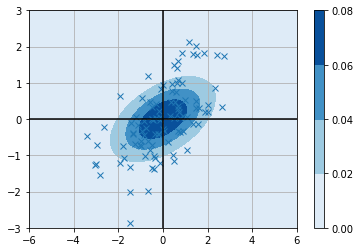

In [0]:
normal_scatter(mean,cov)

If $\rho_{xy} = 0$, then $x$ and $y$ are __indpendent__

We have diagonal $\Sigma$ in this case

In this case, we get inflated ellipse in 2D according to the direction of __max__ variance

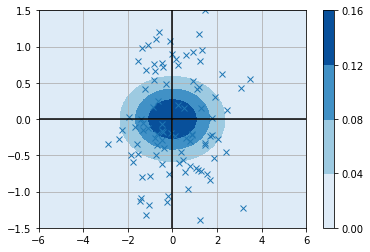

In [0]:
mean = np.array([0, 0])
cov = np.array([[2, 0], [0, .5]])
normal_scatter(mean,cov)

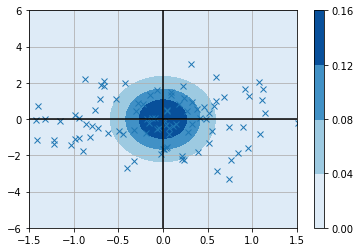

In [0]:
mean = np.array([0, 0])
cov = np.array([[.5, 0], [0, 2]])
normal_scatter(mean,cov)

If $\Sigma = I$ then we have a circle, meaning, all axes variations are the same:


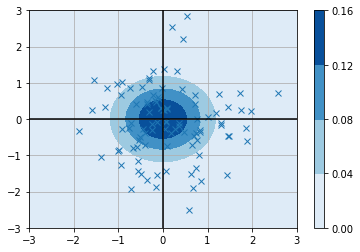

In [0]:
mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])
normal_scatter(mean,cov)

## Using scipy

As we did in the 1D case, we could use scipy to evaluate the pdf equation for us:

In [0]:
m = 10
mean = np.array([0, 0])
cov = np.array([[2, 1], [1, 1]])

sigma_x = cov[0,0]
sigma_y = cov[1,1]
mu_x = mean[0]
mu_y = mean[1]
rho = cov[0,1]/(sigma_x*sigma_y)

X = np.random.multivariate_normal(mean, cov, m)
p_x_y = multivariate_normal.pdf(X, mean, cov)

print(p_x_y)
p_x_y.shape

[0.09462043 0.03492574 0.10961329 0.07304406 0.15021743 0.03320386
 0.13147753 0.06477662 0.06892461 0.0702591 ]


(10,)

In [0]:
m = 10
mean = np.array([0, 0])
cov = np.array([[2, 1], [1, 1]])

sigma_x = cov[0,0]
sigma_y = cov[1,1]
mu_x = mean[0]
mu_y = mean[1]
rho = cov[0,1]/(sigma_x*sigma_y)

x = np.linspace(-1, 1, m)
y = np.linspace(-1, 1, m)
X = np.array(list(zip(x,y)))

#X = multivariate_normal(mean, cov, m)
p_x_y = multivariate_normal.pdf(X, mean, cov)

print(p_x_y)
p_x_y.shape

[0.09653235 0.11761412 0.13639529 0.15055413 0.15817553 0.15817553
 0.15055413 0.13639529 0.11761412 0.09653235]


(10,)

In [0]:
X.shape

(10, 2)

In general:

$$X \in \Bbb{R}^{m \times n}$$
$$\mu \in \Bbb{R}^{n \times 1}$$
$$\Sigma \in \Bbb{R}^{n \times n}$$

In [0]:
'''
def calc_p_normal(X, mu, cov):
  return multivariate_normal.pdf(X, mu, cov)
'''  

'\ndef calc_p_normal(X, mu, cov):\n  return multivariate_normal.pdf(X, mu, cov)\n'

## Calculate probability (Area Under Curve) (CDF)



For disrete $X$, the probaility translates to __normalized__ histogram. Hence, the probability that $X$ takes a value in _any_ bin, is the normalized _count_ of values in that bin. But again, the probability that $X$ takes this exact value will be very low, since it's not common to have the exact value counted many times. Also, in case of discrete $X$, it's like a range of $X$s from the start to end of the bin.


Given the reasoning above, we usually calculate the probability of the RV takes a certain range, which translates to integration in continous case as follows:
$$P(X<X_0) = \int_{-\infty}^{X_0}P(X;\mu, \Sigma)$$

In case of discrete, the integration is a summation.

This maps to an area under the curve of the pdf. OR in case of discrete $X$, it's the cumulation of the values of bin counts, hence it's called __cumulative density function CDF__


In [0]:
X_0 = 0.25
mu, sigma = 0, 0.2
P_X_less_X_0 = norm.cdf(X_0, mu, sigma)
P_X_less_X_0

0.8943502263331446

Let's see what this are means:

## Fill area under curve

In [0]:
def plot_area(mu, sigma, limit1, limit2, ax, color):

  x1 = limit1
  x2 = limit2


  x = np.arange(x1, x2, 0.001) # range of x in spec
  p_w1 = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
  y = norm.pdf(x,mu,sigma)
  y2 = norm.pdf(p_w1,mu,sigma)

  # build the plot
  #fig, ax = plt.subplots(figsize=(9,6))
  #plt.style.use('fivethirtyeight')
  ax.plot(p_w1,y2)

  ax.fill_between(x,y,0, alpha=0.3, color=color)
  ax.fill_between(p_w1,y2,0, alpha=0.1)
  ax.set_xlim([-1,1])
  ax.set_xlabel('# of Standard Deviations Outside the Mean')
  ax.set_yticklabels([])

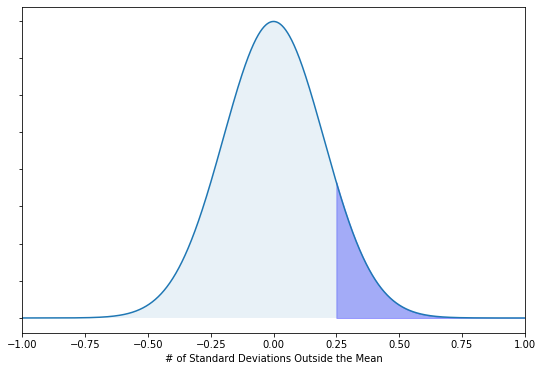

In [0]:
fig, ax = plt.subplots(figsize=(9,6))
mu, sigma = 0, 0.2
plot_area(mu, sigma, 0.25,1,ax,'b')

As you can see, the area is the light blue one (x<0.25)

To get the dark blue one, we have to do 1-CDF:

In [0]:
1-norm.cdf(X_0, mu, sigma)

0.10564977366685535

# Plotting

To plot the normal curve we have many ways:

## From samples

We can first sample the distribution, but this will give __unordered__ and __repeated__ values. 

What we want is an axis, say x, and the corresponding values P(X)

So what to do if we have samples?

The simplest way is to __Group__ those samples, using histogram. This is the simple counting idea to build a density function

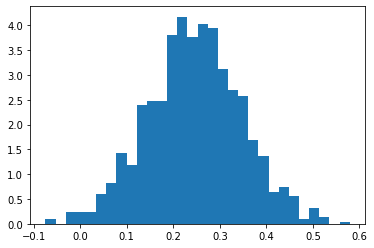

In [0]:
mu, sigma = 0.25, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)


Now having the bins as our x-axis, we can evaluate the pdf at every point:

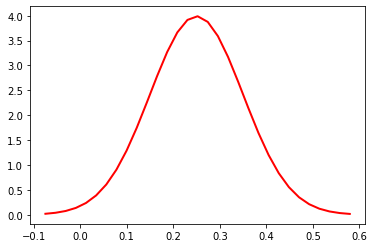

In [0]:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

We could overlap both:

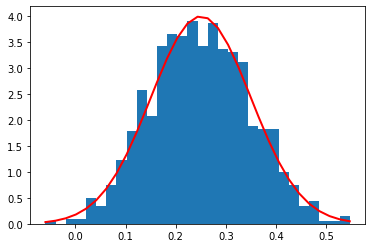

In [0]:
mu, sigma = 0.25, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

Alternatively, we could sweep the x-axis usign linspace, and evaluate P at each point:

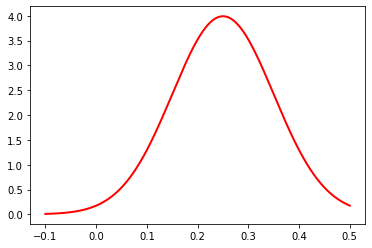

In [0]:
mu, sigma = 0.25, 0.1 # mean and standard deviation
x = np.linspace(-.1,.5,1000)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

Equivalently using scipy

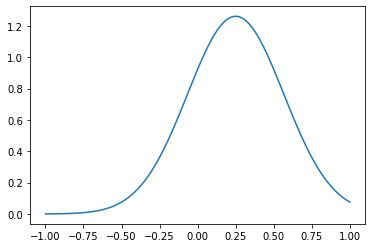

In [0]:
mu, sigma = 0.25, 0.1 # mean and standard deviation
x = np.linspace(-1,1,100)
plt.plot(x, multivariate_normal.pdf(x,mu,sigma))


## n-D

In case we have $m$ samples of $X_i$, each of dimension $n$, then we have a matrix as follows:

$$ X = 
\begin{bmatrix}
X_1^T\\
X_2^T\\
...\\
X_m^T\\
\end{bmatrix}
$$

In this case, $X \in \Bbb{R}^{m \times n}$



To plot, we need to __span__ or __sweep__ $n$ axes. Say we want resolution as $m$ values per axis, then we have $m \times m \times m .... \times m (n-times)$ evaluations of $P(X; \mu\, Sigma)$


To sweep $n$ axes, with $m$ values per each, we need $m \times m \times ,....\times m (n-times)$ points each having $n$ dimensions, so we need points matrix of size $m \times m \times m \times.....\times n$.

For each point, we need to evaluate $P(X; \mu, \Sigma)$

`np.meshgrid` can be used to repeat every axis to obtain all combinations as follows:

In [0]:
x = [1,2,3]
y = [4,5,6]
x, y = np.meshgrid(x,y)
print(x)
print(y)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]


We can have a grid of size $m \times m \times n$ that represent all the points in that space as follows:

In [0]:
grid = np.empty(x.shape + (2,))
grid[:, :, 0] = x; grid[:, :, 1] = y

grid.shape

(3, 3, 2)

In [0]:
grid

array([[[1., 4.],
        [2., 4.],
        [3., 4.]],

       [[1., 5.],
        [2., 5.],
        [3., 5.]],

       [[1., 6.],
        [2., 6.],
        [3., 6.]]])

The above grid represent all $m \times m$ = 9 points in the grid, with their coordinates

To understand it better, consider the simple 2D case:

In [0]:
x = [0,1]
y = [0,1]
x, y = np.meshgrid(x,y)
grid = np.empty(x.shape + (2,))
grid[:, :, 0] = x; grid[:, :, 1] = y
grid

array([[[0., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 1.]]])

In general it returns a list of axes values (say like linspace), repeated with the length of each axis.

In [0]:
x = [1,2,3]
y = [4,5,6]
z = [4,5,6]
X = np.meshgrid(x,y,z)
print(len(X))


3


In [0]:
x = [1,2,3]
y = [4,5,6]
z = [7,8,9]
x,y,z = np.meshgrid(x,y,z)
print(x)

print(y)

print(z)

[[[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[1 1 1]
  [2 2 2]
  [3 3 3]]]
[[[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]]]
[[[7 8 9]
  [7 8 9]
  [7 8 9]]

 [[7 8 9]
  [7 8 9]
  [7 8 9]]

 [[7 8 9]
  [7 8 9]
  [7 8 9]]]


The above grid can be used to evaluate $P(X;\mu, \Sigma)$ at each point.



Also, in numpy, we can mix linspace operation with meshgrid in one step using `np.mgrid`

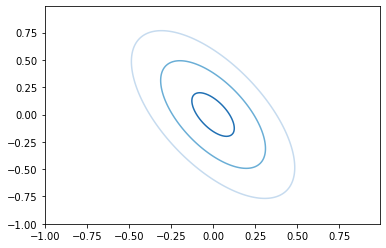

In [0]:
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html
x, y = np.mgrid[-1:1:.01, -1:1:.01]
grid = np.empty(x.shape + (2,))
grid[:, :, 0] = x; grid[:, :, 1] = y

mean = np.array([0, 0])
cov = np.array([[.1, -.25], [-.1, .25]])

#rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
#z = rv.pdf(pos)
z = multivariate_normal(mean, cov).pdf(grid)

#plt.contourf(x, y, rv.pdf(pos))
plt.contour(x, y, z, cmap='Blues', levels=3)

We could also directly use multivariate_normal.pdf instead of nesting as above:

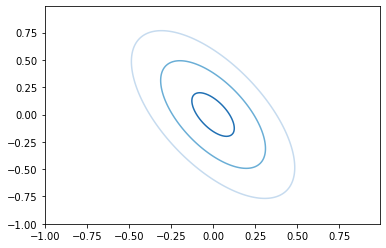

In [0]:
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html
x, y = np.mgrid[-1:1:.01, -1:1:.01]
grid = np.empty(x.shape + (2,))
grid[:, :, 0] = x; grid[:, :, 1] = y

mean = np.array([0, 0])
cov = np.array([[.1, -.25], [-.1, .25]])

#rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
#z = rv.pdf(pos)
z = multivariate_normal.pdf(grid, mean, cov)

#plt.contourf(x, y, rv.pdf(pos))
plt.contour(x, y, z, cmap='Blues', levels=3)

Noice that, we have $m=200$, we expect z to be $200*200=40000$. But since we passed a grid to multivariate_normal.pdf, we get also a grid evaluation of the same shape $200 \times 200$.

In general, it will return $m \times m \times m.....$ for n-D

This enable us to plot it in n-D.

For 2D it will be $m \times m$

In general the number of dimensions of the grid are $n+1$



For 2D, we have 3D grid:

In [0]:
grid.ndim

3

The evaluations of $P(X;\mu, \Sigma)$ are 2D map or projections as we will see below ($n-1$ dims in general)

In [0]:
z.ndim

2

In [0]:
z.shape

(200, 200)

Now let's modify `normal_scatter` to plot the 2D normal curve using the multivariate_normal from scipy:

Instead of 2D projections, we could plot the 3D elevations of the grid evaluations of $P(X;\mu,\Sigma)$



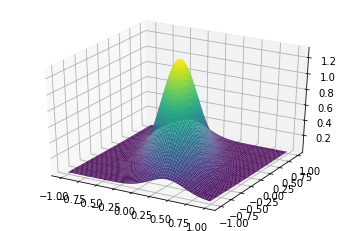

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

In [0]:
def normal_scatter(mean, cov):
  
  size = 100
  sigma_x = cov[0,0]
  sigma_y = cov[1,1]
  mu_x = mean[0]
  mu_y = mean[1]
  rho = cov[0,1]/(sigma_x*sigma_y)

  x, y = np.random.multivariate_normal(mean, cov, size).T

  plt.plot(x, y, 'x')  

  '''
  x = np.linspace(mu_x-3*sigma_x, mu_x+3*sigma_x, size)
  y = np.linspace(mu_y-3*sigma_y, mu_y+3*sigma_y, size)

  x, y = np.meshgrid(x, y)
  '''

  x,y = np.mgrid[mu_x-3*sigma_x:mu_x+3*sigma_x:1/size, mu_y-3*sigma_y:mu_y+3*sigma_y:1/size]
  grid = np.empty(x.shape + (2,))
  grid[:, :, 0] = x; grid[:, :, 1] = y
  

  #z = 1/(2*np.pi*sigma_x*sigma_y) * np.exp(-1/(1-rho**2)*((x-mu_x)**2/(sigma_x**2) + (y-mu_y)**2/(sigma_y**2)-  2*rho*(x-mu_x)/sigma_x*(y-mu_y)/sigma_y))
  z = multivariate_normal.pdf(grid, mean, cov)

  #plt.contourf(x, y, z, cmap='Blues', levels=1)
  #plt.contourf(x, y, z, cmap='Blues', levels=2)
  plt.contourf(x, y, z, cmap='Blues', levels=3)
  #plt.contourf(x, y, z, cmap='Blues', levels=4)
  #plt.contourf(x, y, z, cmap='Blues')

  plt.colorbar()
  plt.grid()
  plt.xlim(mu_x-3*sigma_x, mu_x+3*sigma_x)
  plt.ylim(mu_y-3*sigma_y, mu_y+3*sigma_y)
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')


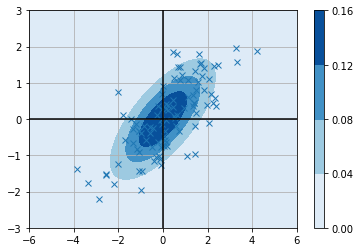

In [0]:

mean = np.array([0, 0])
cov = np.array([[2, 1], [1, 1]])
normal_scatter(mean,cov)

# Covariance matrix

__$\Sigma$ must always be square and symmetric__

If $\sigma_{xy} = \sigma_{yx} = 0$ then we can sample every dimension independetly as we did above.



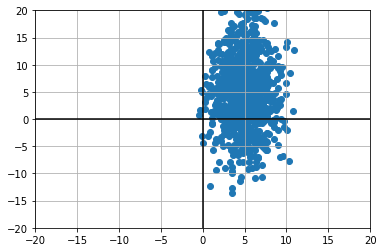

(1000, 1000)


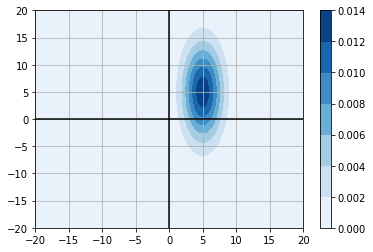

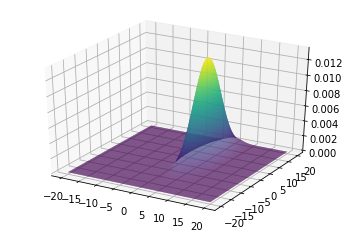

In [0]:
import numpy as np
import matplotlib.pyplot as plt
size = 1000

sigma_x = 2.
sigma_y = 6.

mu_x = 5
mu_y = 5

plt.xlim(-20,20)
plt.ylim(-20,20)

x = np.random.normal(mu_x, sigma_x, 1000)

y = np.random.normal(mu_y, sigma_y, 1000)

plt.scatter(x,y)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


x = np.linspace(-20, 20, size)
y = np.linspace(-20, 20, size)

x, y = np.meshgrid(x, y)
z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((x-mu_x)**2/(2*sigma_x**2)
     + (y-mu_y)**2/(2*sigma_y**2))))
print(z.shape)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.contourf(x, y, z, cmap='Blues')
plt.colorbar()
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)


But if we have inter-dims interaction, $\sigma_{xy}$ and $\sigma_{yx}$, then we must use the multivariate normal distribution general formula above for sampling.

In numpy, we use the multivariate_normal function as above